Homework assigned to AST7939

In [1]:
import imf

In [2]:
imf.salpeter.mmin, imf.salpeter.mmax

(0.3, 120)

In [3]:
imf.kroupa.mmin, imf.kroupa.mmax

(0.03, 120)

In [4]:
imf.chabrier.mmin, imf.chabrier.mmax

(0, inf)

In [5]:
mmin=0.03
mmax=120

# 0. Plot the IMFs

In [6]:
%matplotlib inline
import pylab as pl
pl.rcParams['figure.facecolor'] = 'w'

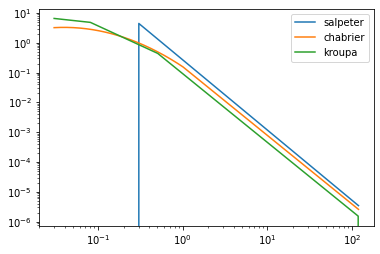

In [7]:
masses = np.geomspace(0.03, 120, 1000)
for distribution in ('salpeter', 'chabrier', 'kroupa'):
    distr = getattr(imf, distribution)
    pl.loglog(masses, distr(masses), label=distribution)
pl.legend(loc='best')

# (a) Mean Mass

In [8]:
mmin=0.03
mmax=120
for distribution in ('Salpeter', 'ChabrierPowerLaw', 'Kroupa'):
    distr = getattr(imf, distribution)(mmin=mmin, mmax=mmax)
    mass_integral = distr.m_integrate(mmin, mmax)[0]
    n_integral = distr.integrate(mmin, mmax)[0]
    print(f'{distribution} mean mass: {mass_integral/n_integral:0.2f}')

Salpeter mean mass: 0.11
ChabrierPowerLaw mean mass: 0.67
Kroupa mean mass: 0.43


# (b) Mean mass of high-mass stars

In [9]:
mmax = 120
mmin = 0.03
for distribution in ('Salpeter', 'ChabrierPowerLaw', 'Kroupa'):
    distr = getattr(imf, distribution)(mmin=mmin, mmax=mmax)
    mean_highmass = distr.m_integrate(8, mmax)[0] / distr.integrate(8, mmax)[0]

    print(f'{distribution} Mean M(M>8) = {mean_highmass:0.2f}')

Salpeter Mean M(M>8) = 19.40
ChabrierPowerLaw Mean M(M>8) = 19.87
Kroupa Mean M(M>8) = 19.87


# (c) Ratio of _number_ of high-mass (M>8 Msun) to low-mass stars

In [10]:
mmax = 120
mmin = 0.03
for distribution in ('Salpeter', 'ChabrierPowerLaw', 'Kroupa'):
    distr = getattr(imf, distribution)(mmin=mmin, mmax=mmax)
    ratio_highmass = distr.integrate(8, mmax)[0]
    ratio_highmasslowmass = distr.integrate(8, mmax)[0] / distr.integrate(mmin, 8)[0]
    print(f'{distribution} N(M>8) / N(tot) = {ratio_highmass:0.4f}, N(M>8) / N(low) = {ratio_highmasslowmass:0.4f}')

Salpeter N(M>8) / N(tot) = 0.0005, N(M>8) / N(low) = 0.0005
ChabrierPowerLaw N(M>8) / N(tot) = 0.0084, N(M>8) / N(low) = 0.0085
Kroupa N(M>8) / N(tot) = 0.0046, N(M>8) / N(low) = 0.0046


# (d) Ratio of _mass_ of high-mass (M>8 Msun) to low-mass stars

In [11]:
mmax = 120
mmin = 0.03
for distribution in ('Salpeter', 'ChabrierPowerLaw', 'Kroupa'):
    distr = getattr(imf, distribution)(mmin=mmin, mmax=mmax)
    ratio_highmass = distr.m_integrate(8, mmax)[0] / distr.m_integrate(mmin, mmax)[0]
    ratio_highmasslowmass = distr.m_integrate(8, mmax)[0] / distr.m_integrate(mmin, 8)[0]
    print(f'{distribution} M(M>8) / M(tot) = {ratio_highmass:0.4f}, M(M>8) / M(low) = {ratio_highmasslowmass:0.4f}')

Salpeter M(M>8) / M(tot) = 0.0917, M(M>8) / M(low) = 0.1010
ChabrierPowerLaw M(M>8) / M(tot) = 0.2491, M(M>8) / M(low) = 0.3318
Kroupa M(M>8) / M(tot) = 0.2094, M(M>8) / M(low) = 0.2648


# (e) Do these numbers change if you change mmax?

In [13]:
mmin = 0.03
for mmax in (100, 1000):
    print(f'\nM_max = {mmax}')
    for distribution in ('Salpeter', 'ChabrierPowerLaw', 'Kroupa'):
        distr = getattr(imf, distribution)(mmin=mmin, mmax=mmax)
        mass_integral = distr.m_integrate(mmin, mmax)[0]
        n_integral = distr.integrate(mmin, mmax)[0]
        print(f'{distribution} mean mass: {mass_integral/n_integral:0.2f}')

        ratio_highmass = distr.m_integrate(8, mmax)[0] / distr.m_integrate(mmin, mmax)[0]
        ratio_highmasslowmass = distr.m_integrate(8, mmax)[0] / distr.m_integrate(mmin, 8)[0]
        print(f'{distribution} M(M>8) / M(tot) = {ratio_highmass:0.4f}, M(M>8) / M(low) = {ratio_highmasslowmass:0.4f}')

        ratio_highmass = distr.integrate(8, mmax)[0]
        ratio_highmasslowmass = distr.integrate(8, mmax)[0] / distr.integrate(mmin, 8)[0]
        print(f'{distribution} N(M>8) / N(tot) = {ratio_highmass:0.4f}, N(M>8) / N(low) = {ratio_highmasslowmass:0.4f}')


M_max = 100
Salpeter mean mass: 0.11
Salpeter M(M>8) / M(tot) = 0.0882, M(M>8) / M(low) = 0.0968
Salpeter N(M>8) / N(tot) = 0.0005, N(M>8) / N(low) = 0.0005
ChabrierPowerLaw mean mass: 0.66
ChabrierPowerLaw M(M>8) / M(tot) = 0.2406, M(M>8) / M(low) = 0.3169
ChabrierPowerLaw N(M>8) / N(tot) = 0.0083, N(M>8) / N(low) = 0.0084
Kroupa mean mass: 0.43
Kroupa M(M>8) / M(tot) = 0.2019, M(M>8) / M(low) = 0.2530
Kroupa N(M>8) / N(tot) = 0.0045, N(M>8) / N(low) = 0.0046

M_max = 1000
Salpeter mean mass: 0.11
Salpeter M(M>8) / M(tot) = 0.1185, M(M>8) / M(low) = 0.1345
Salpeter N(M>8) / N(tot) = 0.0005, N(M>8) / N(low) = 0.0005
ChabrierPowerLaw mean mass: 0.73
ChabrierPowerLaw M(M>8) / M(tot) = 0.3133, M(M>8) / M(low) = 0.4563
ChabrierPowerLaw N(M>8) / N(tot) = 0.0086, N(M>8) / N(low) = 0.0087
Kroupa mean mass: 0.47
Kroupa M(M>8) / M(tot) = 0.2670, M(M>8) / M(low) = 0.3643
Kroupa N(M>8) / N(tot) = 0.0047, N(M>8) / N(low) = 0.0047


#  (f) Do these numbers change if you change mmin?

In [12]:
mmax = 120
for mmin in (0.03, 0.3):
    print(f'\nM_max = {mmax}, M_min={mmin}')
    for distribution in ('Salpeter', 'ChabrierPowerLaw', 'Kroupa'):
        try:
            # the salpeter default mmin is 0.3, so we have to set it lower
            distr = getattr(imf, distribution)(mmin=mmin, mmax=mmax)
        except Exception:
            # the Kroupa MF can't have mmin < 0.08 because of how it is normalized
            distr = getattr(imf, distribution)(mmax=mmax)

        mass_integral = distr.m_integrate(mmin, mmax)[0]
        n_integral = distr.integrate(mmin, mmax)[0]
        print(f'{distribution} mean mass: {mass_integral/n_integral:0.2f}')

        ratio_highmass = distr.m_integrate(8, mmax)[0] / distr.m_integrate(mmin, mmax)[0]
        ratio_highmasslowmass = distr.m_integrate(8, mmax)[0] / distr.m_integrate(mmin, 8)[0]
        print(f'{distribution} M(M>8) / M(tot) = {ratio_highmass:0.4f}, M(M>8) / M(low) = {ratio_highmasslowmass:0.4f}')

        ratio_highmass = distr.integrate(8, mmax)[0]
        ratio_highmasslowmass = distr.integrate(8, mmax)[0] / distr.integrate(mmin, 8)[0]
        print(f'{distribution} N(M>8) / N(tot) = {ratio_highmass:0.4f}, N(M>8) / N(low) = {ratio_highmasslowmass:0.4f}')


M_max = 120, M_min=0.03
Salpeter mean mass: 0.11
Salpeter M(M>8) / M(tot) = 0.0917, M(M>8) / M(low) = 0.1010
Salpeter N(M>8) / N(tot) = 0.0005, N(M>8) / N(low) = 0.0005
ChabrierPowerLaw mean mass: 0.67
ChabrierPowerLaw M(M>8) / M(tot) = 0.2491, M(M>8) / M(low) = 0.3318
ChabrierPowerLaw N(M>8) / N(tot) = 0.0084, N(M>8) / N(low) = 0.0085
Kroupa mean mass: 0.43
Kroupa M(M>8) / M(tot) = 0.2094, M(M>8) / M(low) = 0.2648
Kroupa N(M>8) / N(tot) = 0.0046, N(M>8) / N(low) = 0.0046

M_max = 120, M_min=0.3
Salpeter mean mass: 1.02
Salpeter M(M>8) / M(tot) = 0.2212, M(M>8) / M(low) = 0.2841
Salpeter N(M>8) / N(tot) = 0.0116, N(M>8) / N(low) = 0.0117
ChabrierPowerLaw mean mass: 1.37
ChabrierPowerLaw M(M>8) / M(tot) = 0.2817, M(M>8) / M(low) = 0.3922
ChabrierPowerLaw N(M>8) / N(tot) = 0.0194, N(M>8) / N(low) = 0.0198
Kroupa mean mass: 1.18
Kroupa M(M>8) / M(tot) = 0.2588, M(M>8) / M(low) = 0.3491
Kroupa N(M>8) / N(tot) = 0.0046, N(M>8) / N(low) = 0.0156


#  (g) How many stars go SN in a cluster of 1000 stars?
How massive is such a cluster?

In [14]:
mmax = 120
mmin = 0.03
for distribution in ('Salpeter', 'ChabrierPowerLaw', 'Kroupa'):
    distr = getattr(imf, distribution)(mmin=mmin, mmax=mmax)
    frac_highmass = distr.integrate(8, mmax)[0]
    mean_mass = distr.m_integrate(mmin, mmax)[0] / distr.integrate(mmin, mmax)[0]

    print(f'{distribution:17s} N(M>8) = {frac_highmass*1000:0.2f}  M(N=1000)={mean_mass*1000:0.2g}')

Salpeter          N(M>8) = 0.52  M(N=1000)=1.1e+02
ChabrierPowerLaw  N(M>8) = 8.39  M(N=1000)=6.7e+02
Kroupa            N(M>8) = 4.57  M(N=1000)=4.3e+02


# (g)2 How many stars go SN in a cluster of 1000 Msun?

In [15]:
mmax = 120
mmin = 0.03
for distribution in ('Salpeter', 'ChabrierPowerLaw', 'Kroupa'):
    distr = getattr(imf, distribution)(mmin=mmin, mmax=mmax)
    frac_highmass = distr.m_integrate(8, mmax)[0] / distr.m_integrate(mmin, mmax)[0]
    mean_highmass = distr.m_integrate(8, mmax)[0] / distr.integrate(8, mmax)[0]

    print(f'{distribution:17s} N_SN = N(M>8) = {frac_highmass*1000 / mean_highmass:0.1f}')

Salpeter          N_SN = N(M>8) = 4.7
ChabrierPowerLaw  N_SN = N(M>8) = 12.5
Kroupa            N_SN = N(M>8) = 10.5


# (h) ODF

In an ‘optimal distribution function’ (ODF), the cluster mass to maximum star mass is fixed by defining 􏰖 Mmax ξdM = 1, where
Mmax,cl
Mmax is the maximum possible mass for a star and Mmax,cl
is the most massive star in the cluster. From this definition, determine how many stars must be in a cluster to form one 10 M⊙ star or one 100 M⊙ star.

In [16]:
mmin=0.03
mmax=120
for mstar in (10,100):
    print()
    for distribution in ('Salpeter', 'ChabrierPowerLaw', 'Kroupa'):
        distr = getattr(imf, distribution)(mmin=mmin, mmax=mmax)
        frac_highmass = distr.integrate(mstar, mmax)[0]
        print(f"{distribution}: nstars to make {mstar} msun = {int(1/frac_highmass)}")


Salpeter: nstars to make 10 msun = 2638
ChabrierPowerLaw: nstars to make 10 msun = 160
Kroupa: nstars to make 10 msun = 295

Salpeter: nstars to make 100 msun = 261252
ChabrierPowerLaw: nstars to make 100 msun = 14615
Kroupa: nstars to make 100 msun = 26818


Text(0, 0.5, '$N_{*,cl}$')

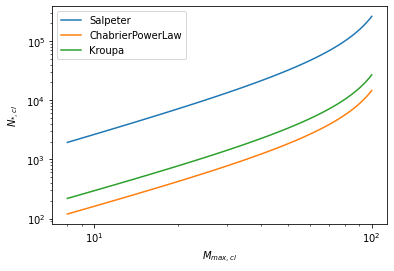

In [17]:
mmin=0.03
mmax=120
pl.clf()
for distribution in ('Salpeter', 'ChabrierPowerLaw', 'Kroupa'):
    distr = getattr(imf, distribution)(mmin=mmin, mmax=mmax)
    massrange = np.linspace(8, 100)
    frac_highmass = np.array([distr.integrate(mr, mmax)[0] for mr in massrange])
    pl.loglog(massrange, 1/frac_highmass, label=distribution)
pl.legend(loc='best')
pl.xlabel("$M_{max,cl}$")
pl.ylabel("$N_{*,cl}$")

# (i) Mass of cluster vs m_max?

(i) What mass of cluster is required to produce a star of that mass?

Salpeter: mass(100Msun) = 2.9e+04, N(100msun) = 261252
ChabrierPowerLaw: mass(100Msun) = 9.8e+03, N(100msun) = 14615
Kroupa: mass(100Msun) = 1.2e+04, N(100msun) = 26818


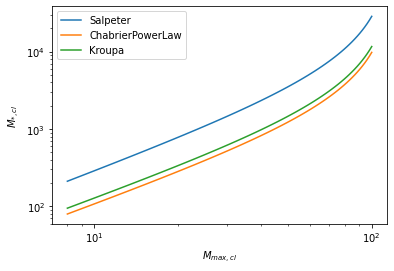

In [18]:
mmax = 120
mmin = 0.03
pl.clf()
for distribution in ('Salpeter', 'ChabrierPowerLaw', 'Kroupa'):
    distr = getattr(imf, distribution)(mmin=mmin, mmax=mmax)
    massrange = np.linspace(8, 100)
    frac_highmass = np.array([distr.integrate(mr, mmax)[0] for mr in massrange])
    
    mass_integral = distr.m_integrate(mmin, mmax)[0]
    n_integral = distr.integrate(mmin, mmax)[0]
    meanmass = mass_integral/n_integral
    
    pl.loglog(massrange, meanmass * 1/frac_highmass, label=distribution)
    print(f"{distribution}: mass(100Msun) = {meanmass / frac_highmass[-1]:0.2g}, N(100msun) = {int(1/frac_highmass[-1])}")
pl.legend(loc='best')
pl.xlabel("$M_{max,cl}$")
pl.ylabel("$M_{*,cl}$");

# (j) Minimum mass to "fully sample" IMF at 95% likelihood

(j) In a probability distribution function, there is only a fix likeli- hood of forming a star of a given mass. What is the minimum cluster mass required to have a > 95% (> 63.21%) probability of forming at least one ≥ 100 M⊙ star?
Recall that the likelihood of rolling at least one six after 100 rolls
is equal to one minus the likelihood of rolling no sixes in 100
rollsi.e.,P(≥1 )=1−􏰀5􏰁100.

How do we formulate the problem?

We want $P(M>100, N=1) > 95\%$

$$P(M>100) = \int_{100}^{M_{max}}\xi dM$$



So we want $P(M<100)^N = 0.05$, solve for $N$

$$N = \log(0.05) / \log (P(M<100))$$

In [19]:
mmax = 120
mmin = 0.03
for distribution in ('Salpeter', 'ChabrierPowerLaw', 'Kroupa'):
    distr = getattr(imf, distribution)(mmin=mmin, mmax=mmax)
    
    n_integral_100 = 1-distr.integrate(100, mmax)[0]
    print(f"ODF {distribution} P(>100) = {n_integral_100}, N_* = 1/(1-P(>100)={int(1/(1-n_integral_100))}")


    mass_integral = distr.m_integrate(mmin, mmax)[0]
    n_integral = distr.integrate(mmin, mmax)[0]
    meanmass = mass_integral/n_integral
    
    nstar = np.log(1-0.95) / np.log(n_integral_100)
    nstar50 = np.log(1-0.6321) / np.log(n_integral_100)

    
    minmass_cluster = meanmass*nstar
    
    print(f"ODF {distribution}: M = {int(1/(1-n_integral_100)) * meanmass:0.2g}")
    print(f"PDF {distribution}: Min mass for >1 100 Msun star at 95%: {minmass_cluster:0.2g} nstars={int(nstar)}")
    print(f"PDF {distribution}: Min mass for >1 100 Msun star at 62.3%: {meanmass*nstar50:0.2g} nstars={int(nstar50)}")
    print()

ODF Salpeter P(>100) = 0.9999961722830673, N_* = 1/(1-P(>100)=261252
ODF Salpeter: M = 2.9e+04
PDF Salpeter: Min mass for >1 100 Msun star at 95%: 8.6e+04 nstars=782640
PDF Salpeter: Min mass for >1 100 Msun star at 62.3%: 2.9e+04 nstars=261237

ODF ChabrierPowerLaw P(>100) = 0.999931578294786, N_* = 1/(1-P(>100)=14615
ODF ChabrierPowerLaw: M = 9.8e+03
PDF ChabrierPowerLaw: Min mass for >1 100 Msun star at 95%: 2.9e+04 nstars=43781
PDF ChabrierPowerLaw: Min mass for >1 100 Msun star at 62.3%: 9.8e+03 nstars=14613

ODF Kroupa P(>100) = 0.9999627129687122, N_* = 1/(1-P(>100)=26818
ODF Kroupa: M = 1.2e+04
PDF Kroupa: Min mass for >1 100 Msun star at 95%: 3.5e+04 nstars=80340
PDF Kroupa: Min mass for >1 100 Msun star at 62.3%: 1.2e+04 nstars=26816



# (k) What's the difference?

(k) Compare the results from the ODF and the PDF for the pres- ence of a M > 100M⊙ star. How can you interpret the differ- ence?

The PDF gives a ~1/3 chance of not having a 100 Msun star, while the ODF guarantees there will be exactly one.

# (l) Luminosity

In [20]:
import scipy.integrate

In [21]:
mmin = 0.03
mmax = 120
for distribution in ('Salpeter', 'ChabrierPowerLaw', 'Kroupa'):
    distr = getattr(imf, distribution)(mmin=mmin, mmax=mmax)
    def lum(x):
        return x**3 * distr(x)
    lum_int = scipy.integrate.quad(lum, mmin, mmax)[0]
    mass_int = distr.m_integrate(mmin,mmax)[0]
    
    print(f"{distribution}: L/M = {lum_int/mass_int:0.1f}")

Salpeter: L/M = 177.3
ChabrierPowerLaw: L/M = 505.0
Kroupa: L/M = 424.5


# (m) Multiplicity

The IMF is the _system_ IMF.  If we are primarily interested
            in the luminosity of a system, splitting the mass between multiple
            stars can make a big difference.  If we assume every star system
            consists of an equal-mass binary, what is the effect on the L/M ratio?
            Is this a reasonable approximation to the multiplicity fraction?


In [22]:
mmin = 0.03
mmax = 120
for distribution in ('Salpeter', 'ChabrierPowerLaw', 'Kroupa'):
    distr = getattr(imf, distribution)(mmin=mmin, mmax=mmax)
    def lum(x):
        return 2*(x/2)**3 * distr(x)
    lum_int = scipy.integrate.quad(lum, mmin, mmax)[0]
    mass_int = distr.m_integrate(mmin,mmax)[0]
    
    print(f"{distribution}: L/M = {lum_int/mass_int:0.1f}")

Salpeter: L/M = 44.3
ChabrierPowerLaw: L/M = 126.3
Kroupa: L/M = 106.1


# (n) ODF effects on L

In [23]:
mmax = 120
mmin = 0.03
mtaurus = 100
for distribution in ('Salpeter', 'ChabrierPowerLaw', 'Kroupa'):
    distr = getattr(imf, distribution)(mmin=mmin, mmax=mmax)
    
    mass_integral = distr.m_integrate(mmin, mmax)[0]
    n_integral = distr.integrate(mmin, mmax)[0]
    meanmass = mass_integral/n_integral
    
    massrange = np.linspace(1,mtaurus)
    frac_highmass = np.array([distr.integrate(mr, mmax)[0] for mr in massrange])
    mcluster = meanmass * (1/frac_highmass)
    maxmass = np.interp(mtaurus, mcluster, massrange)
    
    def lum(x):
        return x**3 * distr(x)
    lum_int = scipy.integrate.quad(lum, mmin, maxmass)[0]
    mass_int = distr.m_integrate(mmin, maxmass)[0]
    
    print(f"{distribution}: Mmax = {maxmass:0.1f} L/M = {lum_int/mass_int:0.1f}")

Salpeter: Mmax = 4.6 L/M = 0.9
ChabrierPowerLaw: Mmax = 9.5 L/M = 8.6
Kroupa: Mmax = 8.3 L/M = 5.7


# Some scribbled noted about likelihoods & die rolls

Probability of one successfull roll out of one attempt:

In [24]:
1/6

0.16666666666666666

Probability of one successful roll out of two attempts

In [25]:
1/6 * 5/6  + 1/6*5/6

0.27777777777777773

In [26]:
(1-(1/6)**2 - (5/6)**2)

0.2777777777777777

Probability of one successful roll out of three attempts

In [27]:
1/6 * (5/6)**2 * 3

0.34722222222222227

In [28]:
1- ((1/6)**3 + (1/6)**2*(5/6)*3 + (5/6)**3)

0.3472222222222221

Sum over all probability = 1

In [29]:
((1/6)**3 + (1/6)**2*(5/6)*3 + (5/6)**3) + (1/6)*(5/6)**2*3

1.0000000000000002

Text(0.5, 0, 'Number of rolls')

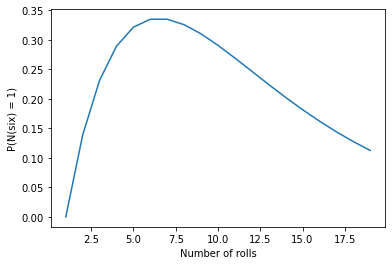

In [30]:
nrolls = np.arange(1,20)
pl.plot(nrolls, (1/6) * (5/6)**(nrolls-1) * (nrolls-1))
pl.ylabel("P(N(six) = 1)")
pl.xlabel("Number of rolls")